In [2]:
# install fredapi, plotly
%pip install fredapi plotly --quiet 



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

# set up style for plt
plt.style.use('fivethirtyeight')

# set max column to 500
pd.options.display.max_columns = 500


# add a color pallete
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# import fredapi 
from fredapi import Fred 

# set env requirements
from dotenv import find_dotenv, load_dotenv
import os 

load_dotenv(find_dotenv())

# set secret key
FRED_API_KEY = os.getenv('FRED_API_KEY')




## Step 1. Creaete Fred Object and Search for Sample Dataset

In [6]:
# create fred object
fred = Fred(api_key=FRED_API_KEY)

# search for a sample dataset
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-01-31,2023-01-31,S&P 500,2013-02-01,2023-01-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-31 19:10:58-06:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-01-31,2023-01-31,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-01-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-31 08:36:01-06:00,55,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2023-01-31,2023-01-31,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,36,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2023-01-31,2023-01-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,90,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-01-31,2023-01-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,83,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RGDPNABNA666NRUG,RGDPNABNA666NRUG,2023-01-31,2023-01-31,Real GDP at Constant National Prices for Brune...,1970-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2021-11-08 13:29:58-06:00,3,Source ID: rgdpna When using these data in yo...
HC01ESTVC1712115,HC01ESTVC1712115,2023-01-31,2023-01-31,Bachelor's Degree or Higher (5-year estimate) ...,2010-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-12-08 10:48:55-06:00,3,Estimate of educational attainment for populat...
RKNANPILA666NRUG,RKNANPILA666NRUG,2023-01-31,2023-01-31,Capital Stock at Constant National Prices for ...,1950-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2021-11-08 13:33:35-06:00,3,Source ID: rkna When using these data in your...


In [9]:
# customize the search option
sp_search = fred.search('S&P', order_by='popularity', sort_order='desc')

sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-01-31,2023-01-31,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-01-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-31 09:10:11-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-01-31,2023-01-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-01-31,2023-01-31,S&P 500,2013-02-01,2023-01-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-31 19:10:58-06:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-01-31,2023-01-31,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-01-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-31 09:09:02-06:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-01-31,2023-01-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,83,"For more information regarding the index, plea..."


## Step 2. Download the Raw Data


In [10]:
# get data series with id 'SP500'
fred.get_series(series_id='SP500')

2013-02-01    1513.17
2013-02-04    1495.71
2013-02-05    1511.29
2013-02-06    1512.12
2013-02-07    1509.39
               ...   
2023-01-25    4016.22
2023-01-26    4060.43
2023-01-27    4070.56
2023-01-30    4017.77
2023-01-31    4076.60
Length: 2608, dtype: float64

## Step 3. Plot the Series

<AxesSubplot:>

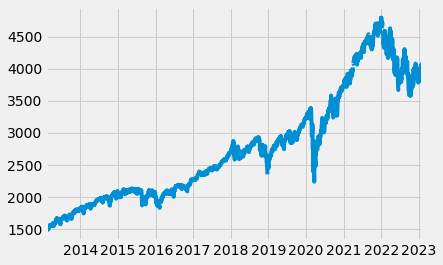

In [11]:
sp500 = fred.get_series(series_id='SP500')

sp500.plot()

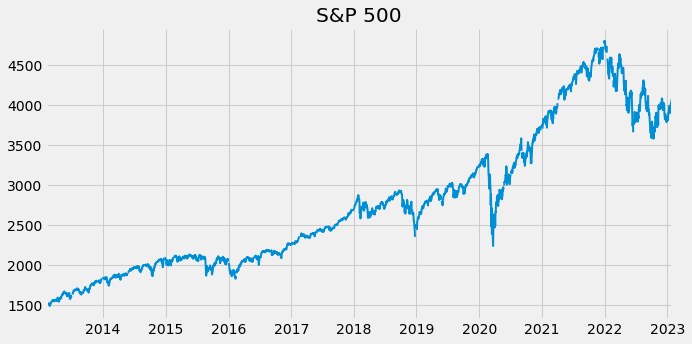

In [12]:
# style the plot
sp500.plot(figsize=(10,5),
            title='S&P 500',
            lw=2
)

plt.show()

## Step 4. Join Multiple Data Series

### Task: Find Unemployment Data

In [13]:
fred.search('unemployment')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-01-31,2023-01-31,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-01-31,2023-01-31,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 07:43:28-06:00,55,The unemployment rate represents the number of...
NROU,NROU,2023-01-31,2023-01-31,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,67,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-01-31,2023-01-31,Continued Claims (Insured Unemployment),1967-01-07,2023-01-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-01-26 07:33:05-06:00,72,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-01-31,2023-01-31,Unemployment Level,1948-01-01,2022-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-01-06 07:43:24-06:00,68,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN64TTFRA156N,LRUN64TTFRA156N,2023-01-31,2023-01-31,Unemployment Rate: Aged 15-64: All Persons for...,2003-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-09-14 15:45:03-05:00,1,OECD descriptor ID: LRUN64TT OECD unit ID: ST ...
LRUN64TTFRA156S,LRUN64TTFRA156S,2023-01-31,2023-01-31,Unemployment Rate: Aged 15-64: All Persons for...,2003-01-01,2021-01-01,Annual,A,Percent,%,Seasonally Adjusted,SA,2022-09-14 15:45:03-05:00,1,OECD descriptor ID: LRUN64TT OECD unit ID: STS...
LRUN64TTFRQ156N,LRUN64TTFRQ156N,2023-01-31,2023-01-31,Unemployment Rate: Aged 15-64: All Persons for...,1999-01-01,2022-07-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-01-13 11:25:44-06:00,1,OECD descriptor ID: LRUN64TT OECD unit ID: ST ...


In [14]:
# explore sample data - ie 'UNRATE' series that is seasonally-adjusted & monthly
fred.get_series(series_id='UNRATE')

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-08-01    3.7
2022-09-01    3.5
2022-10-01    3.7
2022-11-01    3.6
2022-12-01    3.5
Length: 900, dtype: float64

<AxesSubplot:>

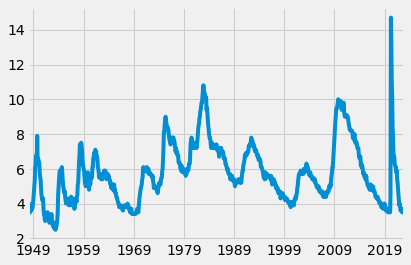

In [15]:
# plot the UNRATE series
unemp_rate = fred.get_series(series_id='UNRATE')
unemp_rate.plot()

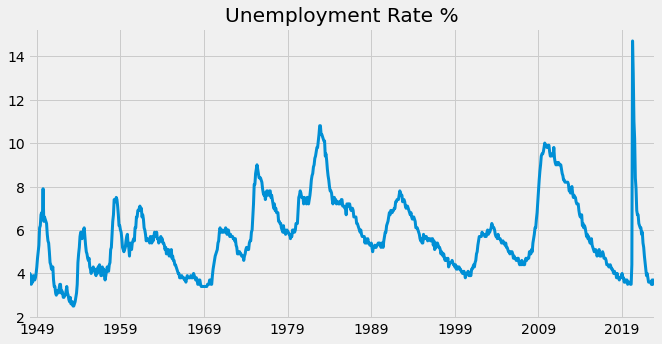

In [16]:
# style plot
unemp_rate.plot(figsize=(10,5),
                title='Unemployment Rate %',
                lw=3)
plt.show()

### Task: Search for State-Specific Unemployment Data - i.e., Texas

In [18]:
# further narrow the search to Monthly data
fred.search('unemployment state texas', filter=('frequency', 'Monthly'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
TXUR,TXUR,2023-01-31,2023-01-31,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:03-06:00,48,None
TXURN,TXURN,2023-01-31,2023-01-31,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-25 08:26:21-06:00,13,None
AUST448URN,AUST448URN,2023-01-31,2023-01-31,"Unemployment Rate in Austin-Round Rock, TX (MSA)",1990-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-29 10:20:02-06:00,28,None
AUST448UR,AUST448UR,2023-01-31,2023-01-31,"Unemployment Rate in Austin-Round Rock, TX (MSA)",1990-01-01,2022-11-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2022-12-29 13:31:11-06:00,2,None
DALL148URN,DALL148URN,2023-01-31,2023-01-31,Unemployment Rate in Dallas-Fort Worth-Arlingt...,1990-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-29 10:20:03-06:00,26,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN481430000000005,LAUCN481430000000005,2023-01-31,2023-01-31,"Employed Persons in Erath County, TX",1990-01-01,2022-11-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2022-12-29 10:27:58-06:00,1,These data come from the Current Population Su...
LAUCN484410000000005,LAUCN484410000000005,2023-01-31,2023-01-31,"Employed Persons in Taylor County, TX",1990-01-01,2022-11-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2022-12-29 10:27:08-06:00,1,These data come from the Current Population Su...
LAUCN480590000000005,LAUCN480590000000005,2023-01-31,2023-01-31,"Employed Persons in Callahan County, TX",1990-01-01,2022-11-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2022-12-29 10:28:03-06:00,1,These data come from the Current Population Su...


### Task: Create a DF Consisting of Monthly Unemployment Data for States